In [32]:
# Part I: function plot of Logistic Regression 
## plot graph for sigmoid function and cost function
import numpy as np
import math

In [33]:
x = np.linspace(-10,10);
y = 1 / (1+np.exp(-x));

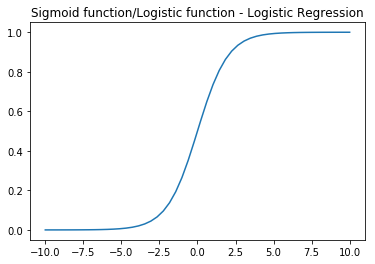

In [34]:
from matplotlib import pyplot as plt
plt.plot(x,y,'-');
plt.title('Sigmoid function/Logistic function - Logistic Regression');
plt.show();

In [4]:
x = np.linspace(0.001,0.999,1000);
y = -np.log(x);
yy = -np.log(1-x);

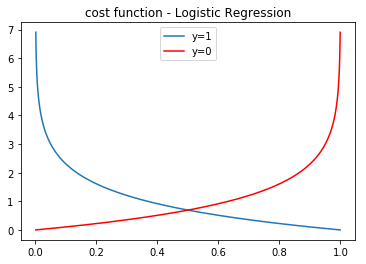

In [5]:
plt.plot(x,y,x,yy,'r-');
plt.legend(["y=1","y=0"]);
plt.title('cost function - Logistic Regression')
plt.show();

In [6]:
# Part II: Logistic Regression
## build a classification model that estimates an 
## applicant's probability of admission based on 
## the scores from those two exams.

In [7]:
import pandas as pd
data = pd.read_csv('ex2data1.csv');
data.head()

,score1,score2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [8]:
positive_train_examples = data[data['admission'] == 1];
negative_train_examples = data[data['admission'] == 0];

In [9]:
def plotData(x1,y1,x2,y2,xlabel='x',ylabel='y',title='title',lengend=['y=1','y=0']):
    plt.plot(x1,y1,'r+');
    plt.plot(x2,y2,'yo');
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);
    plt.legend(lengend,loc=1);
    plt.show();
    

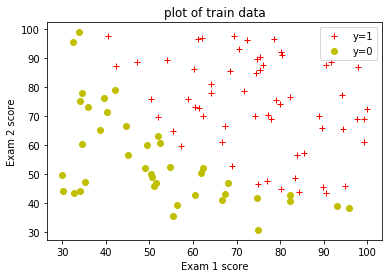

In [10]:
plotData(positive_train_examples['score1'],positive_train_examples['score2'],
         negative_train_examples['score1'],negative_train_examples['score2'],
        xlabel='Exam 1 score', ylabel='Exam 2 score',
        title="plot of train data");

In [12]:
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
X = data.as_matrix(['score1','score2']);
y = data.as_matrix(['admission']);

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
linear_model = LogisticRegression(solver='lbfgs')

In [15]:
y = data['admission'];
clf = linear_model.fit(X,y);

In [16]:
test = [[45, 85]];
clf.predict_proba(test)


array([[0.2247144, 0.7752856]])

In [17]:
print(clf.coef_,clf.intercept_);

[[0.20535491 0.2005838 ]] [-25.05219314]


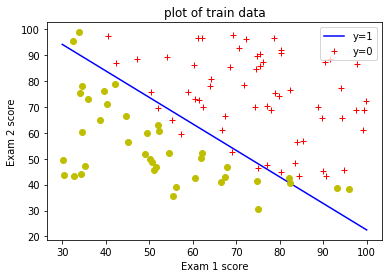

In [18]:
x1 = np.linspace(30,100,100);
x2 = -(clf.intercept_ + clf.coef_[0][0] * x1)/clf.coef_[0][1];
plt.plot(x1,x2,'b-');

plotData(positive_train_examples['score1'],positive_train_examples['score2'],
         negative_train_examples['score1'],negative_train_examples['score2'],
        xlabel='Exam 1 score', ylabel='Exam 2 score',
        title="plot of train data");

plt.show();

In [19]:
clf.score(X,y)

0.89

In [20]:
# Part III: Regularized logistic regression
# Task: predict whether microchips from a fabrication plant
# passes quality assurance(QA).

In [21]:
train_examples = pd.read_csv('ex2data2.csv');

In [22]:
positive_train_examples = train_examples[train_examples['qa']==1];
negative_train_examples = train_examples[train_examples['qa']==0];

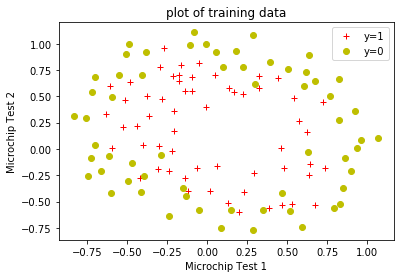

In [23]:
plotData(positive_train_examples['test1'],
         positive_train_examples['test2'],
         negative_train_examples['test1'],
         negative_train_examples['test2'],
         xlabel='Microchip Test 1',
         ylabel='Microchip Test 2',
         title='plot of training data');

In [24]:
X = train_examples.as_matrix(['test1','test2']);
y = train_examples['qa'];
clf = linear_model.fit(X,y);
clf.score(X,y)

0.5423728813559322

In [25]:
print(clf.coef_,clf.intercept_);

[[-0.26541433 -0.01162176]] [-0.0174072]


In [26]:
def mapFeatures(x1,x2):
    degree=6
    index = 0
    out = np.zeros((x1.size,27));
    out
    for i in range(1,degree+1):
        for j in range(0,i+1):
            out[:,index] = (x2 ** j) * (x1 **(i-j));
            index = index+1;
    return out

x1 = np.array([2]);
x2 = np.array([3]);
mapFeatures(x1,x2)

array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,  24.,
         36.,  54.,  81.,  32.,  48.,  72., 108., 162., 243.,  64.,  96.,
        144., 216., 324., 486., 729.]])

In [27]:
new_X = mapFeatures(X[:,0],X[:,1]);
new_y = y;

In [28]:
clf = linear_model.fit(new_X,new_y);
clf.score(new_X,new_y)

0.8305084745762712

In [29]:
print(clf.intercept_,clf.coef_);

[1.27271075] [[ 0.62536719  1.18095854 -2.01961804 -0.91752388 -1.43170395  0.12391867
  -0.36536954 -0.35715555 -0.17501434 -1.45827831 -0.05112356 -0.61575808
  -0.27472128 -1.19276292 -0.24241519 -0.20587922 -0.0448395  -0.27780311
  -0.29535733 -0.45625452 -1.04347339  0.02770608 -0.29252353  0.01550105
  -0.32746466 -0.1439423  -0.92460358]]


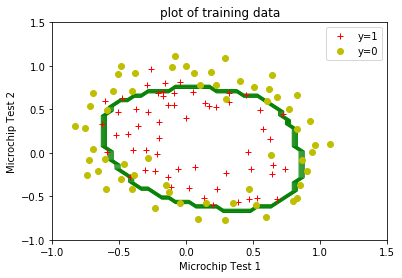

In [30]:
def plotDecisionBoundary(clf):
    u = np.linspace(-1,1.5,50);
    v = np.linspace(-1,1.5,50);

    U,V = np.meshgrid(u,v);
    Z = np.zeros((len(u),len(v)));
    for i in range(0,len(u)):
        for j in range(0,len(v)):
            test = mapFeatures(np.array(u[i]),np.array(v[j]));
            Z[i,j] = clf.predict(test);
    
    plt.contour(U,V,Z,colors='g', linewidths=1);
    plt.legend(['boundary']);
    
    plotData(positive_train_examples['test1'],
         positive_train_examples['test2'],
         negative_train_examples['test1'],
         negative_train_examples['test2'],
         xlabel='Microchip Test 1',
         ylabel='Microchip Test 2',
         title='plot of training data');
    
plotDecisionBoundary(clf);